In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle

In [2]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the dataset directory and read the CSV file
dataset_path = os.path.join(os.path.dirname(current_dir), 'dataset', 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#TotalCharges in object data type, convert to floating data type
#CustomerID column not required -> drop

In [7]:
df = df.drop(columns='customerID')

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
#because for the null values of TotalCharges, the tenure column is 0 months so does not make sense to calculate charges.
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})
df["TotalCharges"] = df["TotalCharges"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
#churn counts
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


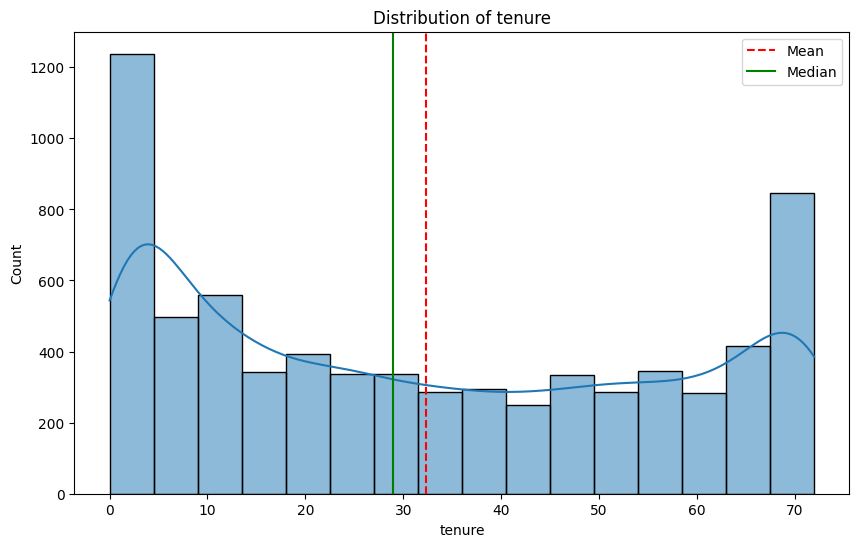

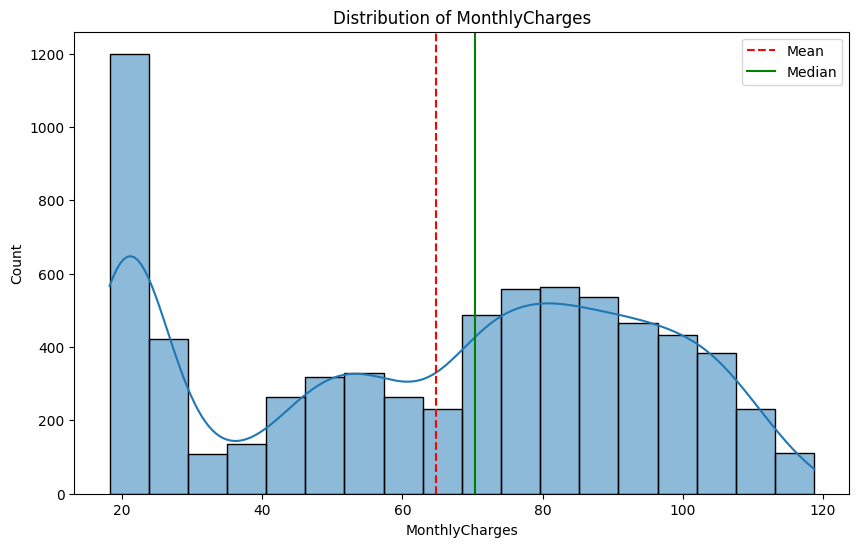

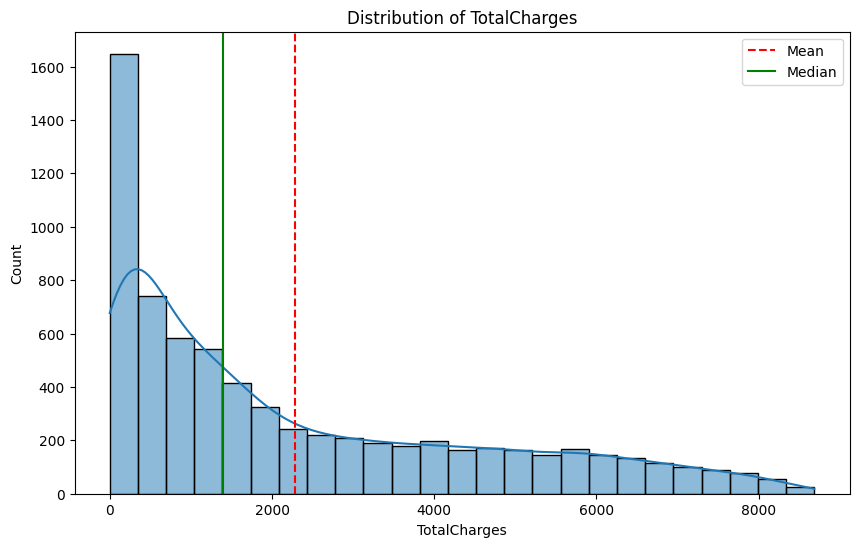

In [14]:
def histogram_graph(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")
    plt.legend()

histogram_graph(df, 'tenure')
histogram_graph(df, 'MonthlyCharges')
histogram_graph(df, 'TotalCharges')

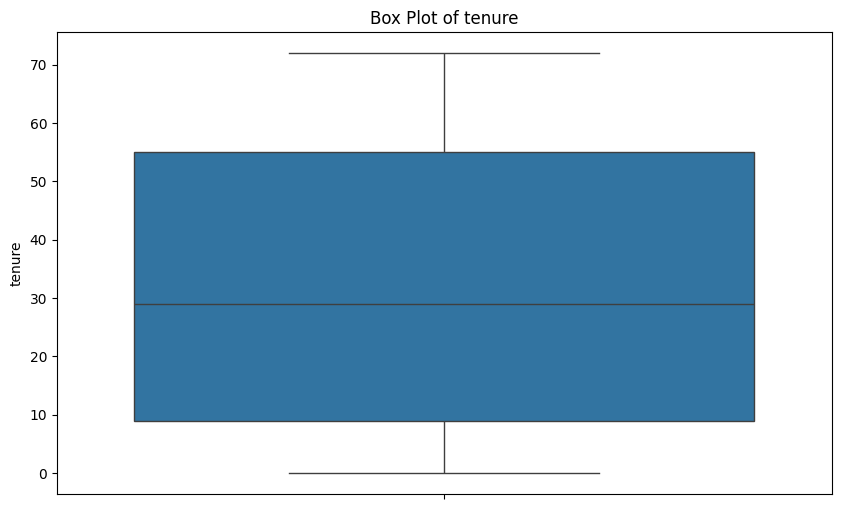

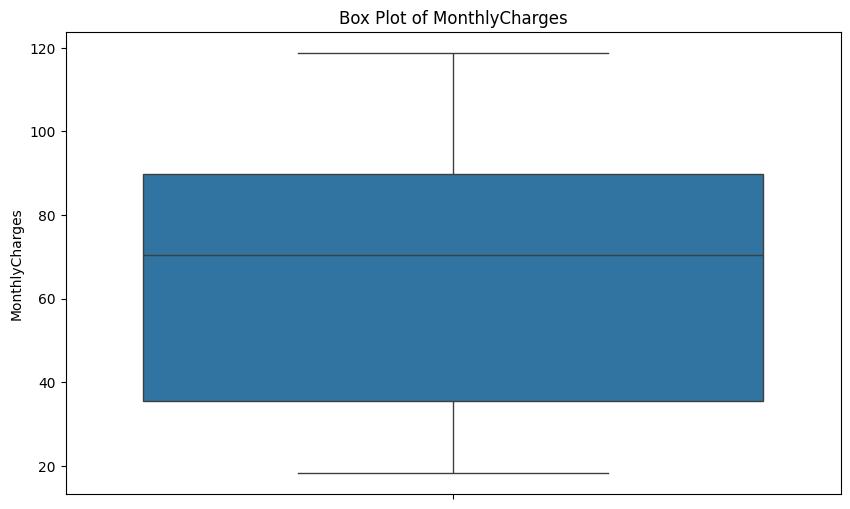

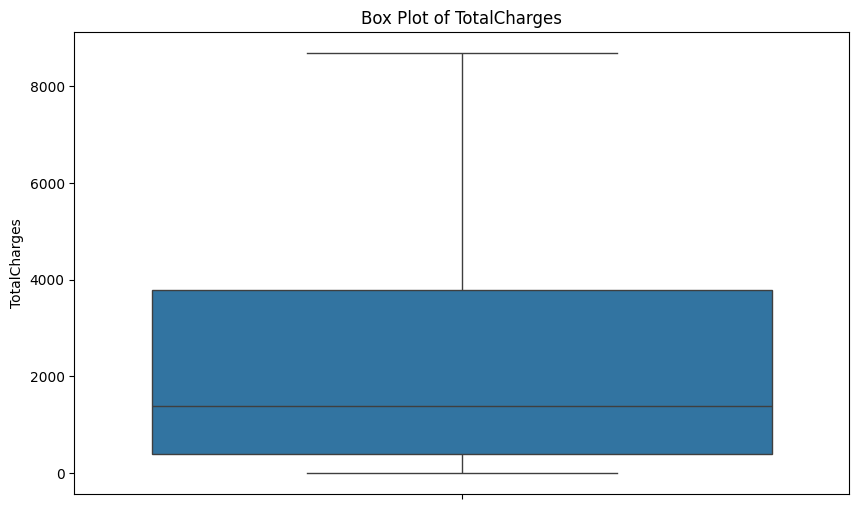

In [15]:
def boxplot_graph(df, column_name):

  plt.figure(figsize=(10,6))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show
  
boxplot_graph(df, "tenure")
boxplot_graph(df, "MonthlyCharges")
boxplot_graph(df, "TotalCharges")


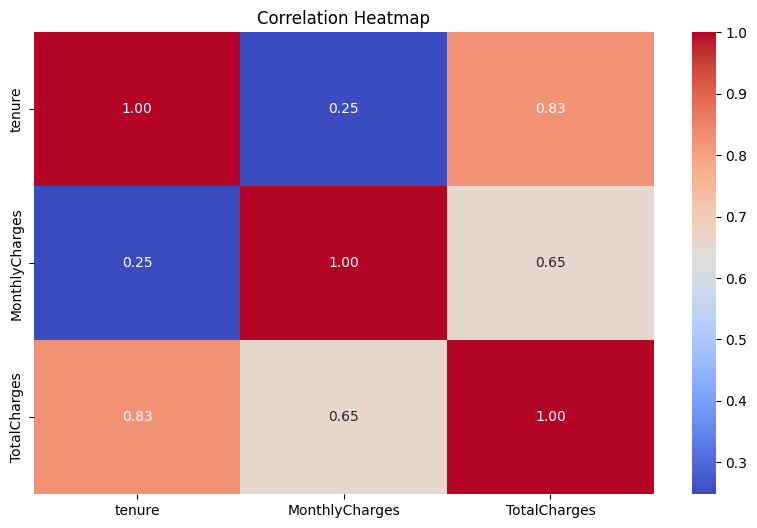

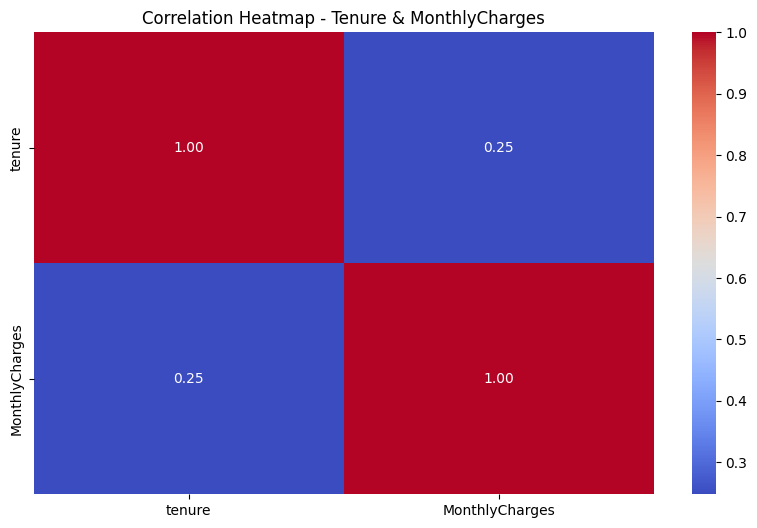

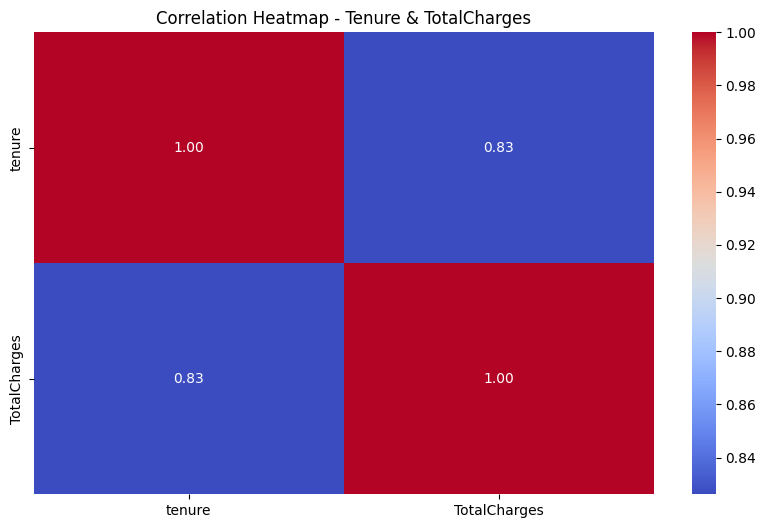

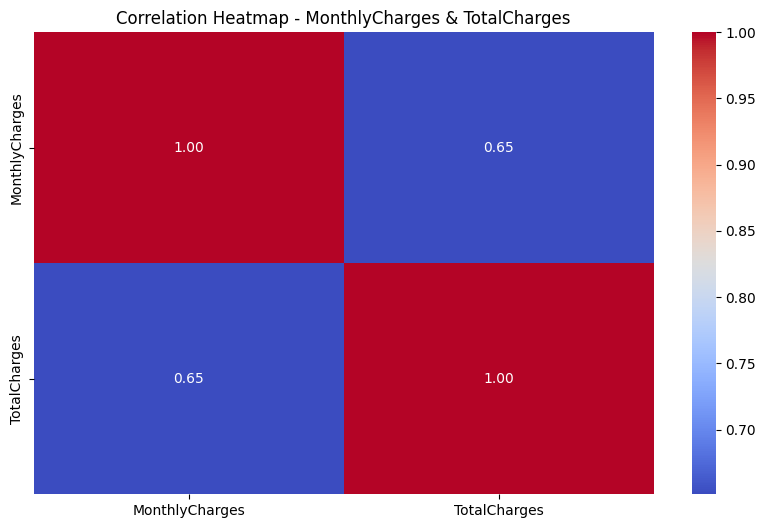

In [16]:
# correlation matrix - heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# correlation matrix - heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[["tenure", "MonthlyCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Tenure & MonthlyCharges")
plt.show()

# correlation matrix - heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[["tenure", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Tenure & TotalCharges")
plt.show()

# correlation matrix - heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[["MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - MonthlyCharges & TotalCharges")
plt.show()

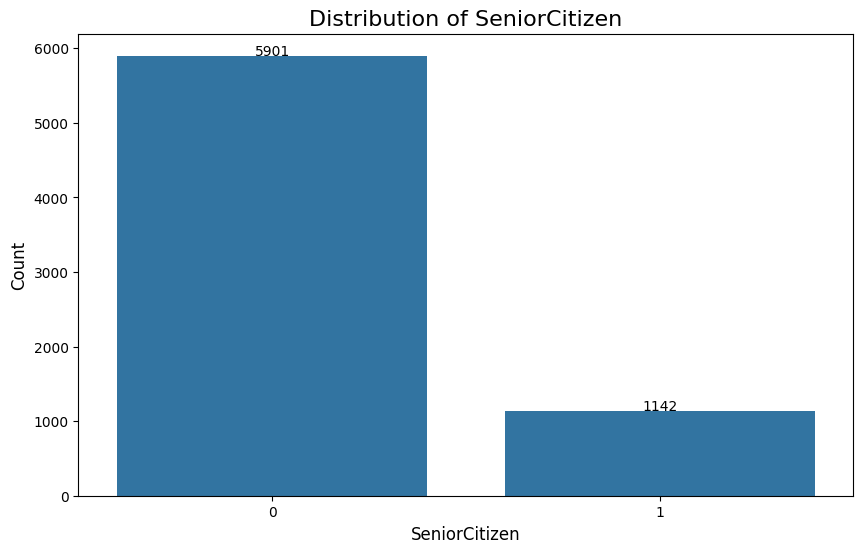

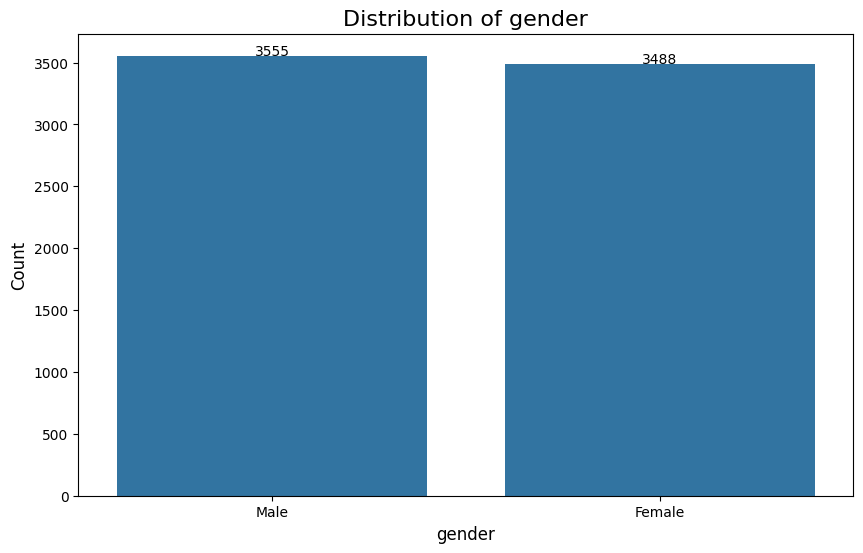

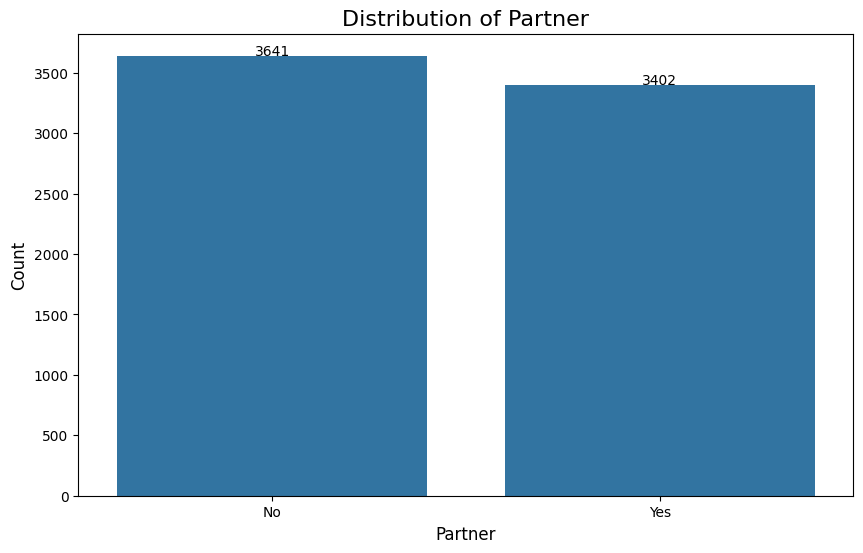

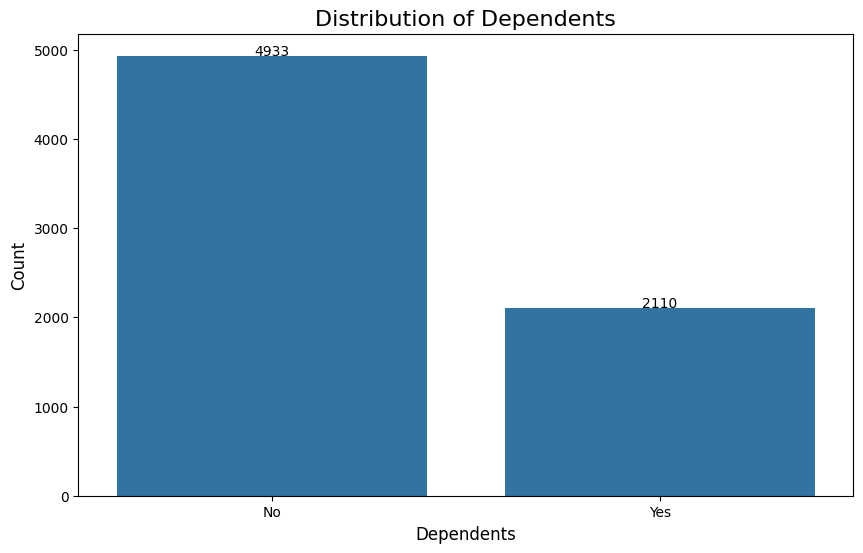

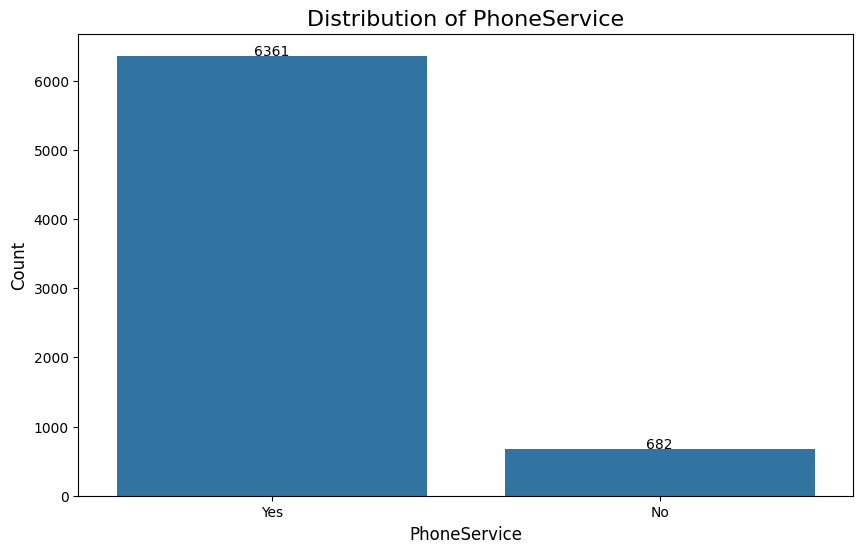

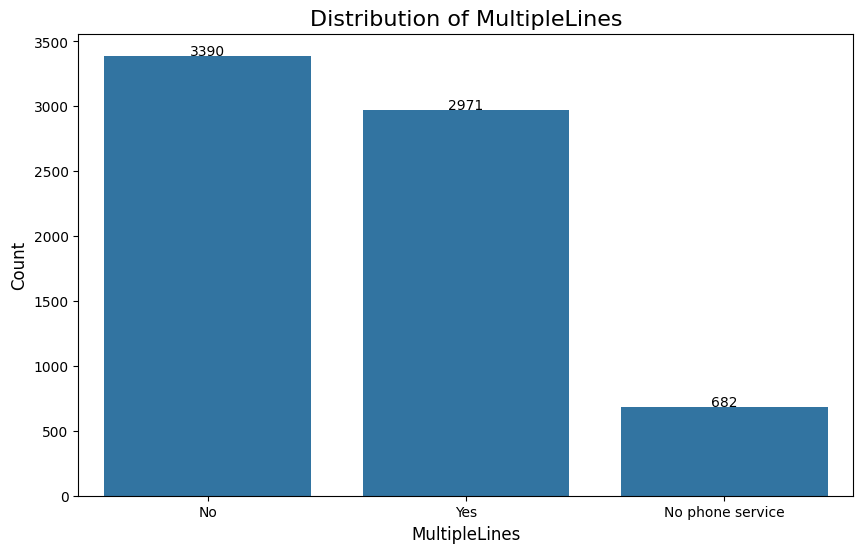

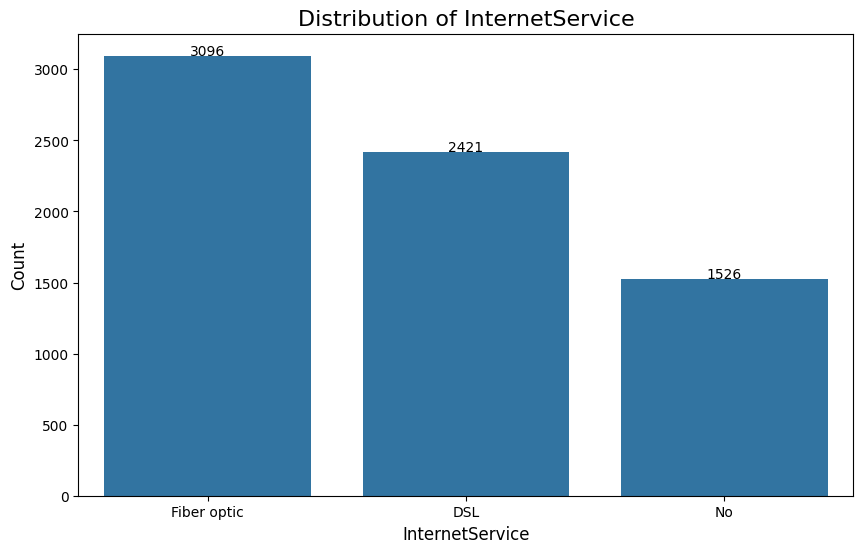

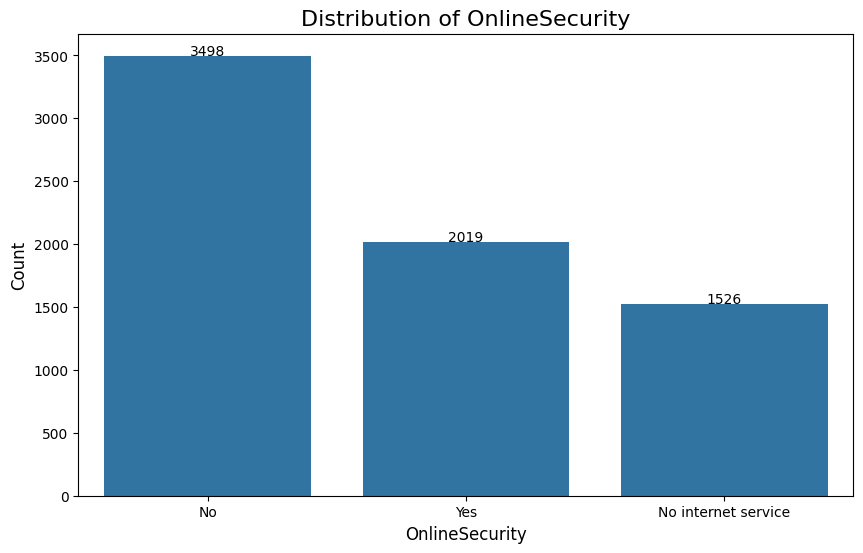

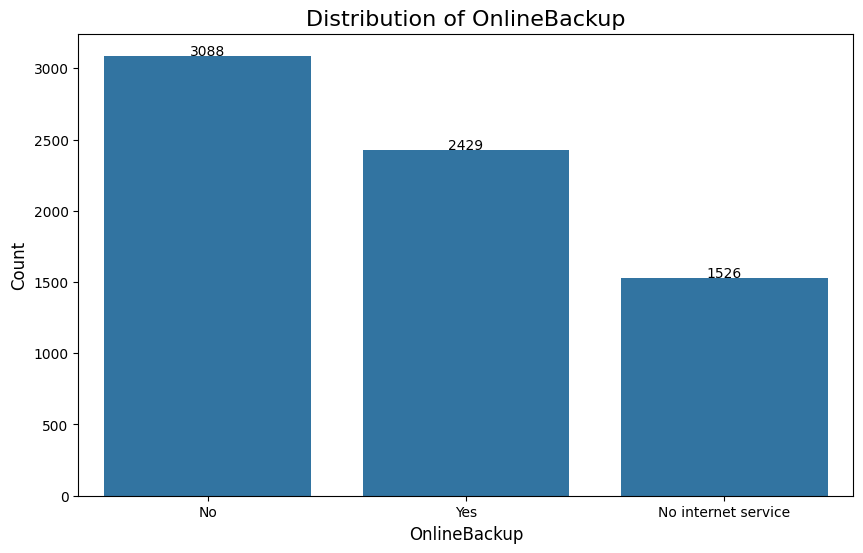

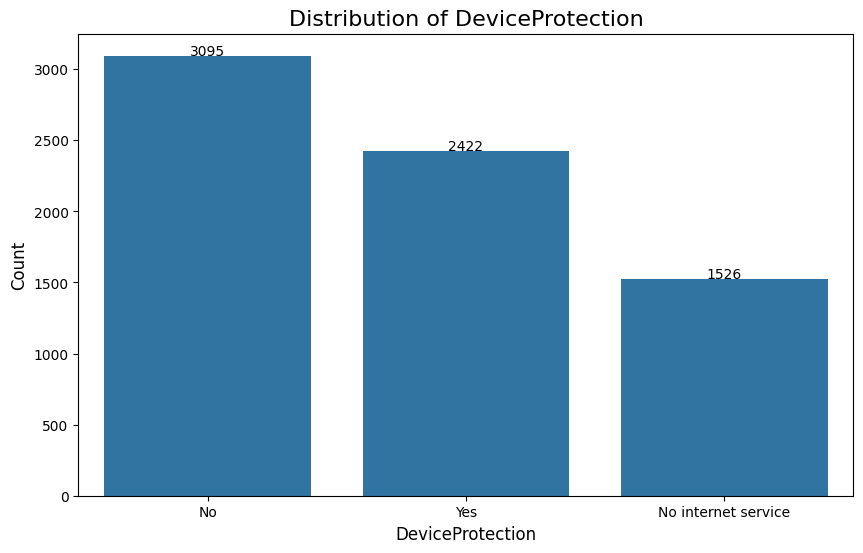

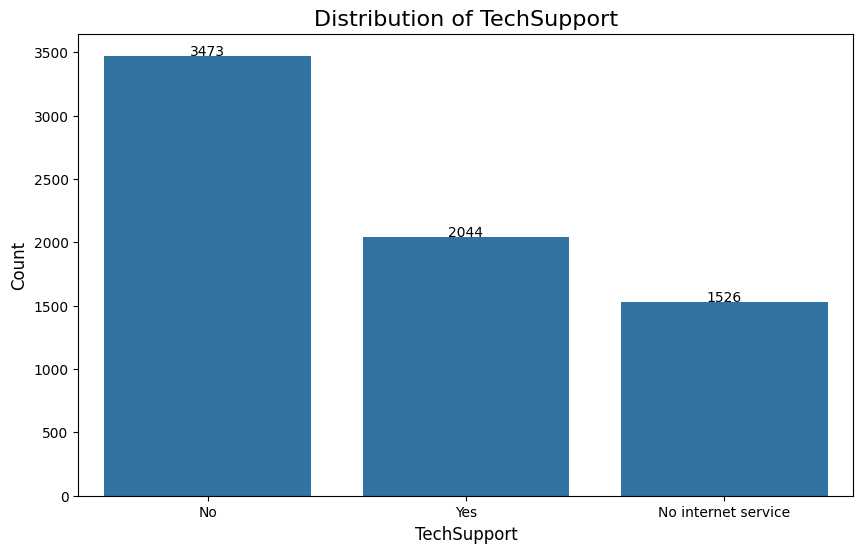

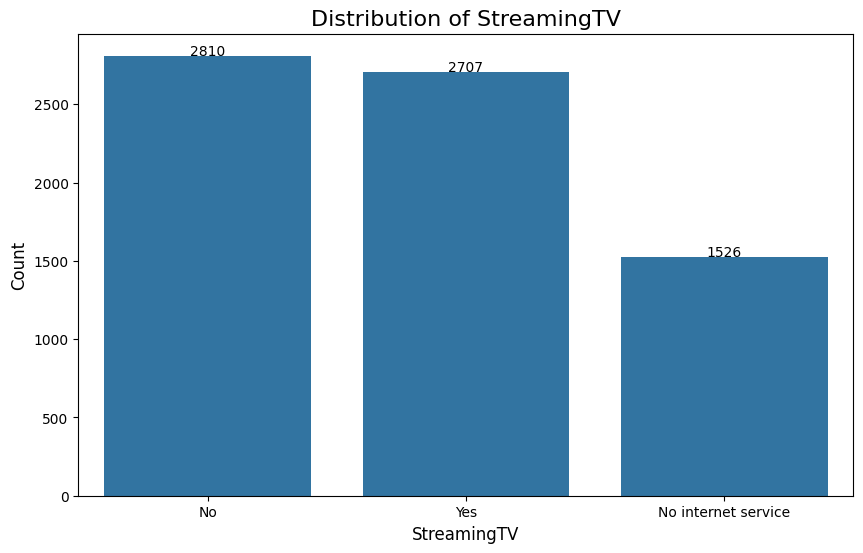

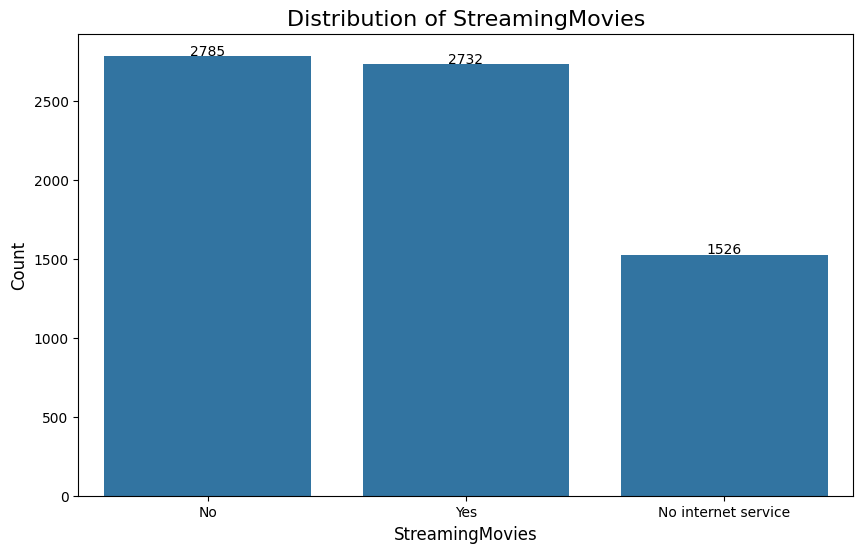

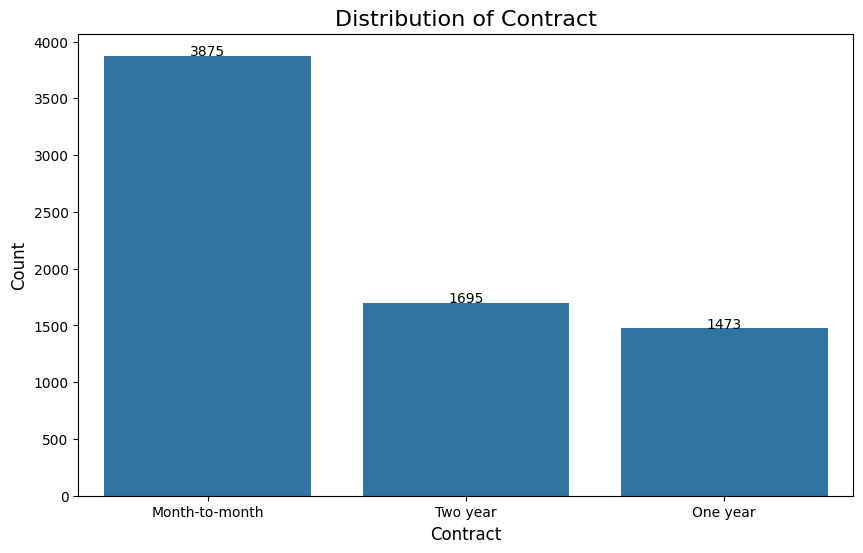

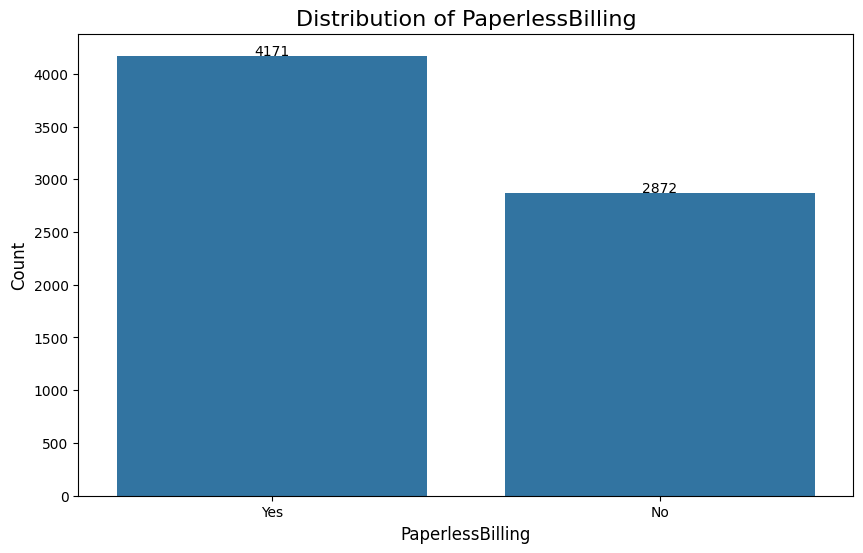

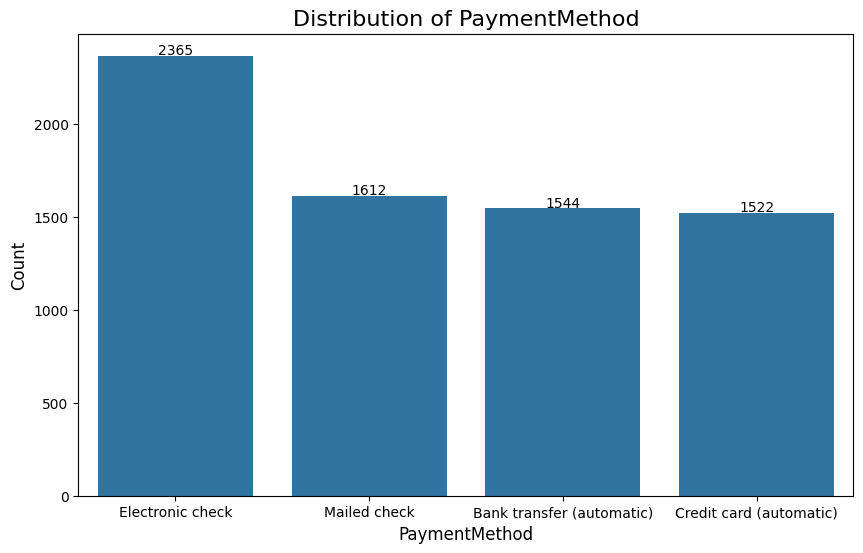

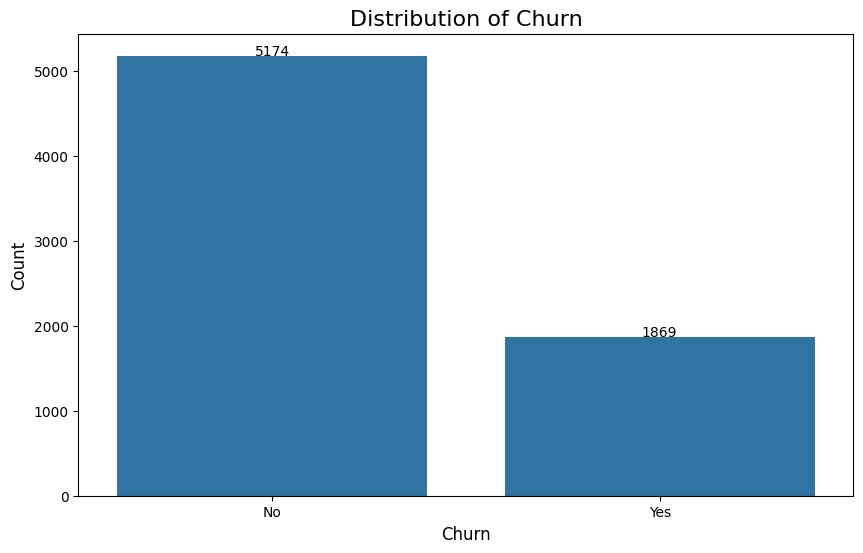

In [17]:
# Get categorical columns and include 'SeniorCitizen'
cat_cols = df.select_dtypes(include="object").columns.tolist()
if 'SeniorCitizen' in df.columns and 'SeniorCitizen' not in cat_cols:
    cat_cols = ['SeniorCitizen'] + cat_cols

# Loop through each categorical column and plot
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    
    # Get value counts to sort the bars
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = [col, 'count']
    
    # Create countplot
    ax = sns.barplot(
        data=value_counts,
        x=col,
        y='count'
    )

    # Add count labels on top of each bar
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 5,  # Small offset from top of bar
            f'{int(height)}',
            ha='center', 
            fontsize=10
        )

    # Customize plot
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

In [18]:
df['Churn'] = df['Churn'].map({"Yes": 1, "No": 0})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
# label encoding for 'object' features
cat_cols = df.select_dtypes(include="object").columns.tolist()

encoders = {}
for col in cat_cols:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder

In [21]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [22]:
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders,f)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [24]:
x = df.drop(columns = ['Churn'])
y = df['Churn']

In [25]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [26]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [28]:
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [29]:
# dictionary of models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [30]:
# dictionary to store the cross validation results
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv_scores = {}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model in models.items():
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=skf, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} stratified CV accuracy: {np.mean(scores):.2f}")

Decision Tree stratified CV accuracy: 0.79
Random Forest stratified CV accuracy: 0.85
XGBoost stratified CV accuracy: 0.84


In [31]:
cv_scores

{'Decision Tree': array([0.78743961, 0.80193237, 0.81280193, 0.79710145, 0.79347826,
        0.79589372, 0.78960097, 0.7859734 , 0.77267231, 0.80290206]),
 'Random Forest': array([0.84782609, 0.87318841, 0.86111111, 0.83574879, 0.83937198,
        0.85144928, 0.8573156 , 0.85247884, 0.84764208, 0.83917775]),
 'XGBoost': array([0.83937198, 0.85144928, 0.84057971, 0.83937198, 0.8321256 ,
        0.84299517, 0.85126965, 0.84643289, 0.82829504, 0.83071342])}

In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [33]:
# Grid Search with Stratified K-Fold
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',  
    n_jobs=-1,
    verbose=2
)

In [34]:
# Fit on SMOTE-balanced training data
grid_search.fit(x_train_smote, y_train_smote)

# Best model from grid search
best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [35]:
# Predict on test data
y_test_pred = best_rf.predict(x_test)

In [36]:
# Evaluation
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score:
 0.7821149751596878
Confusion Matrix:
 [[884 152]
 [155 218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [37]:
model_data = {"model": best_rf, "features_names": x.columns.tolist()}


with open("customer_churn_model.pkl", "wb") as f:
  pickle.dump(model_data, f)

In [38]:
with open("customer_churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [39]:
print(loaded_model)
print(feature_names)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=200, random_state=42)
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [40]:
# Testing with new unseen data
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 4,
    'PhoneService': 'Yes',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'Yes',
    'StreamingTV': 'No',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 25.00,
    'TotalCharges': 100.00
}

input_data_df = pd.DataFrame([input_data])

# Load encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Store original values before encoding for analysis
original_values = input_data_df.copy()

# Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

# Make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# Print basic results
print("\nPREDICTION RESULTS")
print(f"Churn Probability: {pred_prob[0][1]:.2%}")
print(f"No Churn Probability: {pred_prob[0][0]:.2%}")
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")

# Analysis section
print("\nPREDICTION ANALYSIS")

# Get feature importances if model supports it
if hasattr(loaded_model, 'feature_importances_'):
    # For tree-based models
    importances = loaded_model.feature_importances_
    features = input_data_df.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    print("Top 5 Most Important Features:")
    for i, row in importance_df.head(5).iterrows():
        feature = row['Feature']
        importance = row['Importance']
        original_value = original_values[feature].values[0] if feature in original_values else input_data_df[feature].values[0]
        print(f"- {feature}: {original_value} (Importance: {importance:.4f})")
        
elif hasattr(loaded_model, 'coef_'):
    # For linear models
    importances = abs(loaded_model.coef_[0])
    features = input_data_df.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    print("Top 5 Most Influential Factors:")
    for i, row in importance_df.head(5).iterrows():
        feature = row['Feature']
        importance = row['Importance']
        original_value = original_values[feature].values[0] if feature in original_values else input_data_df[feature].values[0]
        print(f"- {feature}: {original_value} (Coefficient Magnitude: {importance:.4f})")
        
elif hasattr(loaded_model, 'estimators_') and hasattr(loaded_model.estimators_[0], 'feature_importances_'):
    # For ensemble models
    importances = np.mean([estimator.feature_importances_ for estimator in loaded_model.estimators_], axis=0)
    features = input_data_df.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    print("Top 5 Most Important Features:")
    for i, row in importance_df.head(5).iterrows():
        feature = row['Feature']
        importance = row['Importance']
        original_value = original_values[feature].values[0] if feature in original_values else input_data_df[feature].values[0]
        print(f"- {feature}: {original_value} (Importance: {importance:.4f})")
        
else:
    # Generic analysis based on typical churn factors
    print("Key factors that may be influencing the prediction:")
    
    # Check for short tenure (common churn factor)
    if input_data['tenure'] < 12:
        print(f"- Short tenure: {input_data['tenure']} months (Customers with low tenure are more likely to churn)")
    
    # Check contract type
    if input_data['Contract'] == 'Month-to-month':
        print("- Month-to-month contract (Flexibility makes churning easier)")
    
    # Check payment method
    if input_data['PaymentMethod'] == 'Electronic check':
        print("- Electronic check payment method (Associated with higher churn rates)")
    
    # Check for lack of key services that typically reduce churn
    if input_data['OnlineSecurity'] == 'No':
        print("- No online security service (Missing service associated with higher churn)")
    if input_data['TechSupport'] == 'No':
        print("- No tech support service (Missing service associated with higher churn)")
    
    # Check for high monthly charges but low tenure (price sensitivity)
    if input_data['MonthlyCharges'] > 70 and input_data['tenure'] < 12:
        print(f"- High monthly charges (${input_data['MonthlyCharges']:.2f}) with short tenure")

# Add a summary interpretation
print("\nSUMMARY")
if pred_prob[0][1] > 0.7:
    print(f"This customer has a high churn probability ({pred_prob[0][1]:.2%}), likely due to a combination of")
    print("risky factors like contract type, payment method, and specific service selections.")
elif pred_prob[0][1] > 0.4:
    print(f"This customer has a moderate churn probability ({pred_prob[0][1]:.2%}), with some risk factors")
    print("balanced by positive retention indicators.")
else:
    print(f"This customer has a low churn probability ({pred_prob[0][1]:.2%}), suggesting they are likely to")
    print("remain with the company based on their current profile and service selections.")


PREDICTION RESULTS
Churn Probability: 37.25%
No Churn Probability: 62.75%
Prediction: No Churn

PREDICTION ANALYSIS
Top 5 Most Important Features:
- Contract: Month-to-month (Importance: 0.1506)
- TotalCharges: 100.0 (Importance: 0.1275)
- MonthlyCharges: 25.0 (Importance: 0.1258)
- tenure: 4 (Importance: 0.1181)
- OnlineSecurity: Yes (Importance: 0.0978)

SUMMARY
This customer has a low churn probability (37.25%), suggesting they are likely to
remain with the company based on their current profile and service selections.


In [41]:
# Testing with new unseen data
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 28,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'Yes',
    'TechSupport': 'Yes',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 104.8,
    'TotalCharges': 3046.05
}

input_data_df = pd.DataFrame([input_data])

# Load encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Store original values before encoding for analysis
original_values = input_data_df.copy()

# Encode categorical features using the saved encoders
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

# Make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

# Print basic results
print("\nPREDICTION RESULTS")
print(f"Churn Probability: {pred_prob[0][1]:.2%}")
print(f"No Churn Probability: {pred_prob[0][0]:.2%}")
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")

# Analysis section
print("\nPREDICTION ANALYSIS")

# Get feature importances if model supports it
if hasattr(loaded_model, 'feature_importances_'):
    # For tree-based models
    importances = loaded_model.feature_importances_
    features = input_data_df.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    print("Top 5 Most Important Features:")
    for i, row in importance_df.head(5).iterrows():
        feature = row['Feature']
        importance = row['Importance']
        original_value = original_values[feature].values[0] if feature in original_values else input_data_df[feature].values[0]
        print(f"- {feature}: {original_value} (Importance: {importance:.4f})")
        
elif hasattr(loaded_model, 'coef_'):
    # For linear models
    importances = abs(loaded_model.coef_[0])
    features = input_data_df.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    print("Top 5 Most Influential Factors:")
    for i, row in importance_df.head(5).iterrows():
        feature = row['Feature']
        importance = row['Importance']
        original_value = original_values[feature].values[0] if feature in original_values else input_data_df[feature].values[0]
        print(f"- {feature}: {original_value} (Coefficient Magnitude: {importance:.4f})")
        
elif hasattr(loaded_model, 'estimators_') and hasattr(loaded_model.estimators_[0], 'feature_importances_'):
    # For ensemble models
    importances = np.mean([estimator.feature_importances_ for estimator in loaded_model.estimators_], axis=0)
    features = input_data_df.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)
    
    print("Top 5 Most Important Features:")
    for i, row in importance_df.head(5).iterrows():
        feature = row['Feature']
        importance = row['Importance']
        original_value = original_values[feature].values[0] if feature in original_values else input_data_df[feature].values[0]
        print(f"- {feature}: {original_value} (Importance: {importance:.4f})")
        
else:
    # Generic analysis based on typical churn factors
    print("Key factors that may be influencing the prediction:")
    
    # Check for short tenure (common churn factor)
    if input_data['tenure'] < 12:
        print(f"- Short tenure: {input_data['tenure']} months (Customers with low tenure are more likely to churn)")
    
    # Check contract type
    if input_data['Contract'] == 'Month-to-month':
        print("- Month-to-month contract (Flexibility makes churning easier)")
    
    # Check payment method
    if input_data['PaymentMethod'] == 'Electronic check':
        print("- Electronic check payment method (Associated with higher churn rates)")
    
    # Check for lack of key services that typically reduce churn
    if input_data['OnlineSecurity'] == 'No':
        print("- No online security service (Missing service associated with higher churn)")
    if input_data['TechSupport'] == 'No':
        print("- No tech support service (Missing service associated with higher churn)")
    
    # Check for high monthly charges but low tenure (price sensitivity)
    if input_data['MonthlyCharges'] > 70 and input_data['tenure'] < 12:
        print(f"- High monthly charges (${input_data['MonthlyCharges']:.2f}) with short tenure")

# Add a summary interpretation
print("\nSUMMARY")
if pred_prob[0][1] > 0.7:
    print(f"This customer has a high churn probability ({pred_prob[0][1]:.2%}), likely due to a combination of")
    print("risky factors like contract type, payment method, and specific service selections.")
elif pred_prob[0][1] > 0.4:
    print(f"This customer has a moderate churn probability ({pred_prob[0][1]:.2%}), with some risk factors")
    print("balanced by positive retention indicators.")
else:
    print(f"This customer has a low churn probability ({pred_prob[0][1]:.2%}), suggesting they are likely to")
    print("remain with the company based on their current profile and service selections.")


PREDICTION RESULTS
Churn Probability: 73.21%
No Churn Probability: 26.79%
Prediction: Churn

PREDICTION ANALYSIS
Top 5 Most Important Features:
- Contract: Month-to-month (Importance: 0.1506)
- TotalCharges: 3046.05 (Importance: 0.1275)
- MonthlyCharges: 104.8 (Importance: 0.1258)
- tenure: 28 (Importance: 0.1181)
- OnlineSecurity: No (Importance: 0.0978)

SUMMARY
This customer has a high churn probability (73.21%), likely due to a combination of
risky factors like contract type, payment method, and specific service selections.
